# Analysing Earth using EinsteinPy!

## Calculating the eccentricity and speed at apehelion of Earth's orbit

Various parameters of Earth's orbit considering Sun as schwarzschild body and solving geodesic equations are calculated

### 1. Defining the initial parameters

In [1]:
from astropy import units as u
import numpy as np
from einsteinpy.metric import Schwarzschild
from einsteinpy.coordinates import SphericalDifferential

In [2]:
# Define position and velocity vectors in spherical coordinates
# Earth is at perihelion
M = 1.989e30 * u.kg  # mass of sun
distance = 147.09e6 * u.km
speed_at_perihelion = 30.29 * u.km / u.s
omega = (u.rad * speed_at_perihelion) / distance

sph_obj = SphericalDifferential(distance, np.pi / 2 * u.rad, np.pi * u.rad,
                               0 * u.km / u.s, 0 * u.rad / u.s, omega)

   - Defining $\lambda$ (or $\tau$) for which to calculate trajectory
     - $\lambda$ is proper time and is approximately equal to coordinate time in non-relativistic limits

In [3]:
# Set lambda to complete an year.
# Lambda is always specified in secs
end_lambda = ((1 * u.year).to(u.s)).value
# Choosing stepsize for ODE solver to be 5 minutes
stepsize = ((5 * u.min).to(u.s)).value

### 2. Making a class instance to get the trajectory in cartesian coordinates

In [4]:
obj = Schwarzschild.from_coords(sph_obj, M)
ans = obj.calculate_trajectory(
    end_lambda=end_lambda, OdeMethodKwargs={"stepsize": stepsize}, return_cartesian=True
)

   - Return value is a tuple consisting of 2 numpy array
     - First one contains list of $\lambda$
     - Seconds is array of shape (n,8) where each component is:
       - t - coordinate time
       - x - position in m
       - y - position in m
       - z - position in m
       - dt/d$\lambda$
       - dx/d$\lambda$
       - dy/d$\lambda$
       - dz/d$\lambda$

In [5]:
ans[0].shape, ans[1].shape

((13150,), (13150, 8))

### Calculating distance at aphelion
   - Should be 152.10 million km

In [6]:
r = np.sqrt(np.square(ans[1][:, 1]) + np.square(ans[1][:, 2]))
i = np.argmax(r)
(r[i] * u.m).to(u.km)

<Quantity 1.52059668e+08 km>

### Speed at aphelion should be 29.29 km/s and should be along y-axis

In [7]:
((ans[1][i][6]) * u.m / u.s).to(u.km / u.s)

<Quantity 29.30005147 km / s>

### Calculating the eccentricity
   - Should be 0.0167

In [8]:
xlist, ylist = ans[1][:, 1], ans[1][:, 2]
i = np.argmax(ylist)
x, y = xlist[i], ylist[i]
eccentricity = x / (np.sqrt(x ** 2 + y ** 2))
eccentricity

0.01661834158657882

### Plotting the trajectory with time

In [9]:
%matplotlib inline

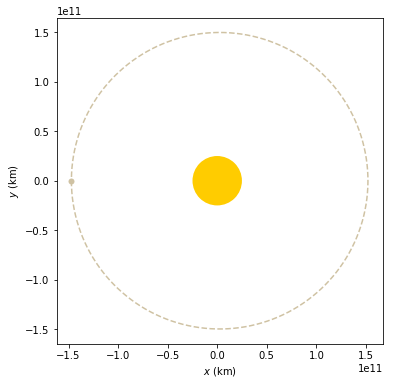

In [10]:
from einsteinpy.bodies import Body
from einsteinpy.geodesic import Geodesic
Sun = Body(name="Sun", mass=M, parent=None)
Object = Body(name="Earth", differential=sph_obj, parent=Sun)
geodesic = Geodesic(body=Object, time=0 * u.s, end_lambda=end_lambda, step_size=stepsize)
from einsteinpy.plotting import StaticGeodesicPlotter
sgp = StaticGeodesicPlotter()
sgp.plot(geodesic)
sgp.show()

 All data regarding earth's orbit is taken from https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html